In [58]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from utils import ProgBar

# Parameters

# Model definition

In [196]:
h = 0.002
k = 0.01
Db = 0.0001
Dn = 0.0001
phi = 0.2
ksi = 0.0
cp = 0.154
lambd_nb = 40
mi_n = 0.2
lambd_bn = 0.1
X_nb = 0.0001
y_n = 0.1
C_nmax = 0.55

model = PINN(
    h,
    k,
    Db,
    Dn,
    phi,
    ksi,
    cp,
    lambd_nb,
    mi_n,
    lambd_bn,
    X_nb,
    y_n,
    C_nmax,
    num_iterations=50,
    batch_size=1000,
    gpu=False,
)

Steps in time = 1000
Steps in space_x = 500
Steps in space_y = 500

CFL:  0.12500000000000003


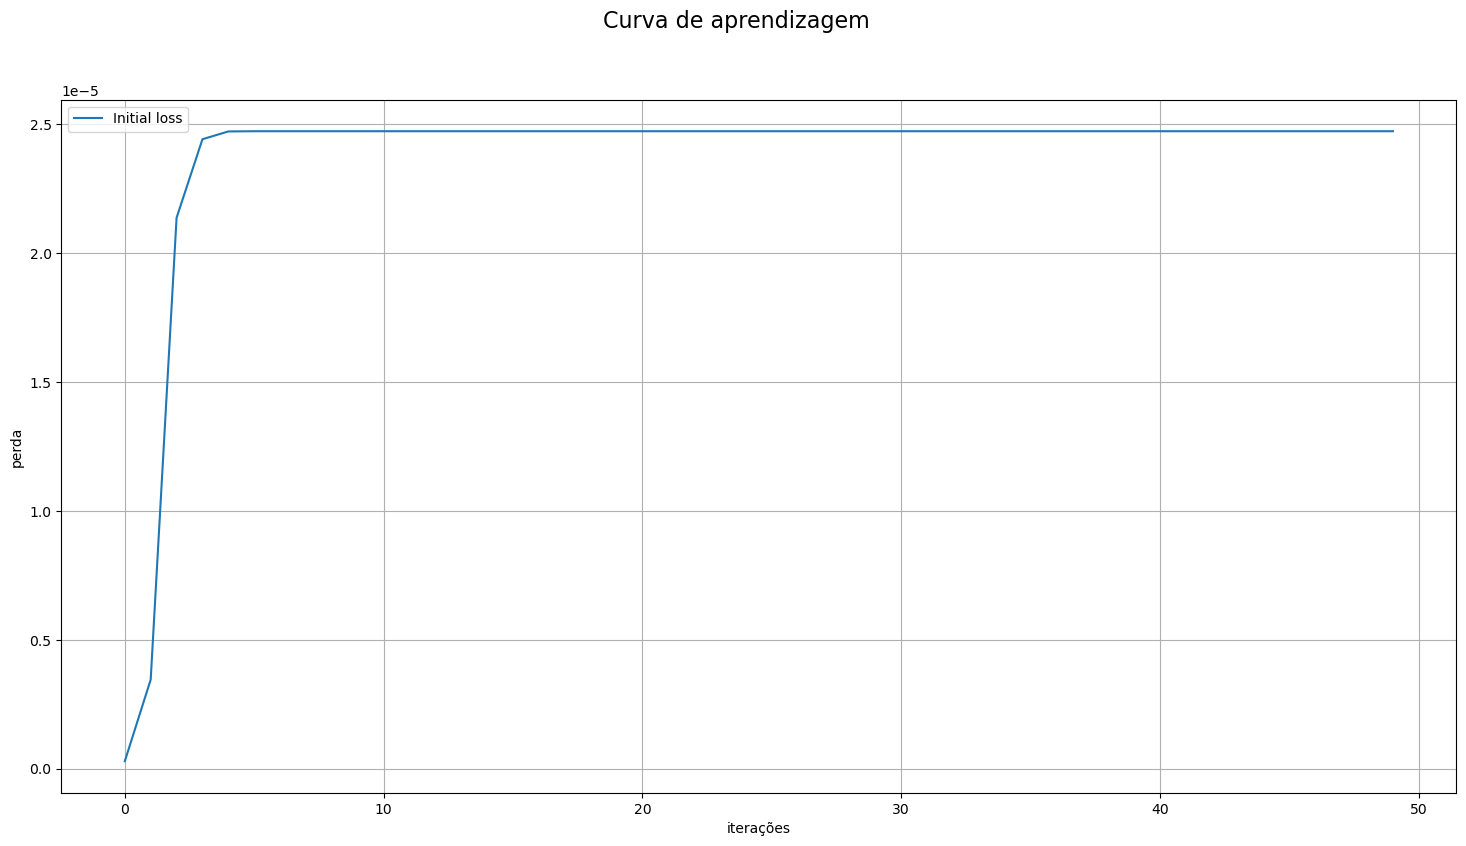

In [198]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Curva de aprendizagem", fontsize=16)


# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel("iterações")
ax.set_ylabel("perda")
ax.plot(range(len(C_initial_loss_it)), C_initial_loss_it, label="Initial loss")
# ax.set_yscale("log")
ax.grid()
ax.legend()


plt.show()

<Axes: >

<Figure size 1800x900 with 0 Axes>

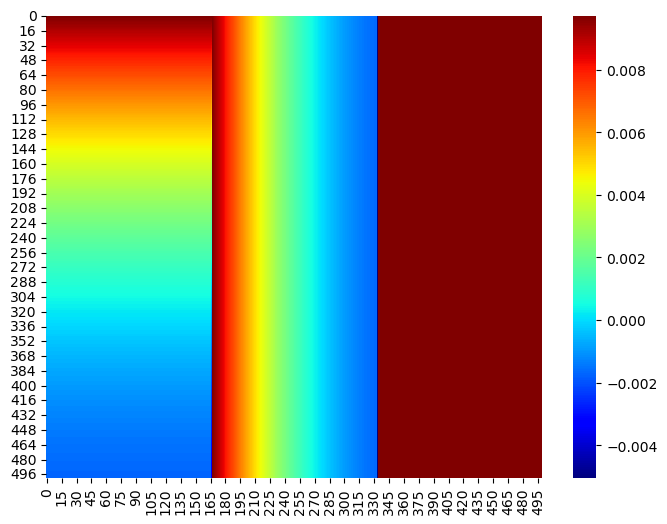

In [216]:
import seaborn as sns

fig = plt.figure(figsize=[18, 9])
plt.figure(figsize=(8, 6))
sns.heatmap(solution[:, :, 0].cpu(), cmap="jet")

In [ ]:
C_boundary_loss_it[-1] + C_initial_loss_it[-1] + C_loss_it[-1]

IndexError: list index out of range

In [ ]:
# t_vals = torch.linspace(0, 1, size_tt)
t_vals = [0]
x_vals = torch.linspace(0, 1, size_x)
y_vals = torch.linspace(0, 1, size_x)
X, Y = torch.meshgrid(x_vals, y_vals)


for t in t_vals:
    with torch.no_grad():

        t_val = torch.ones_like(X) * 0  # specify time

        input_data = torch.stack([X.flatten(), Y.flatten(), t_val.flatten()], dim=1)

        solution = model(input_data)

        Cl, Cp = solution.tensor_split(2, dim=1)
        Cl = Cl.reshape(X.shape, Y.shape)
        Cp = Cp.reshape(X.shape, Y.shape)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)

X, Y = np.meshgrid(x_vals.numpy(), y_vals.numpy())

# vmin = 0
# vmax = np.max([torch.max(Cp),torch.max(Cl)])

# Plotango 3D
ax = fig.add_subplot(1, 2, 1)

contour = ax.contourf(X, Y, Cp[0], cmap="jet")
ax.set_title("Concentração de bactérias")
ax.set_xlabel("X")
ax.set_ylabel("Y")
colobar = fig.colorbar(contour)

# Plotando 2D

ax = fig.add_subplot(1, 2, 2)

contour = ax.contourf(X, Y, Cl, cmap="jet")
ax.set_title("Concentração de neutrófilos")
ax.set_xlabel("X")
ax.set_ylabel("Y")

colobar = fig.colorbar(contour)

plt.show()

NameError: name 'x_vals' is not defined

<Figure size 1800x900 with 0 Axes>